In [4]:
import tensorflow as tf
import numpy as np

In [5]:
data = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=data.load_data()

In [3]:
## One hot ecoding and normalization

In [4]:
training_images = training_images/255.0
test_images = test_images/255.0

In [5]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [6]:
training_images.shape

(60000, 28, 28)

In [7]:
training_images = training_images.reshape(60000,28,28,1)

In [8]:
training_images.shape

(60000, 28, 28, 1)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_images = test_images.reshape(10000,28,28,1)

In [11]:
test_images.shape

(10000, 28, 28, 1)

In [12]:
## Modeling

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [14]:
model = Sequential([ 
    
                #extraction de caracteristiques
    
                tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                
                #flatten
                  tf.keras.layers.Flatten(),  
                    #dense
                    Dense(units=128,activation='relu'),
                    Dense(units=10,activation='softmax')
                    
                   ])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [16]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [17]:
!pip install pydot

In [18]:
!pip install graphviz 

In [19]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
# Entrainment du model CNN

In [32]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.keras',
                                              monitor='val_accuracy',
                                               mode='max',
                                               save_best_only=True
                                              )
stop= tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=1)

In [34]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
h = model.fit(training_images,training_labels,epochs=5,
              validation_data=(test_images,test_labels),
             
             )

Epoch 1/5
1875/1875 [==============================] - 128s 68ms/step - loss: 0.2608 - accuracy: 0.9042 - val_loss: 0.3001 - val_accuracy: 0.8909
Epoch 2/5
1875/1875 [==============================] - 127s 68ms/step - loss: 0.2255 - accuracy: 0.9162 - val_loss: 0.2958 - val_accuracy: 0.8964
Epoch 3/5
1875/1875 [==============================] - 127s 68ms/step - loss: 0.2043 - accuracy: 0.9233 - val_loss: 0.2892 - val_accuracy: 0.9032
Epoch 4/5
1875/1875 [==============================] - 123s 66ms/step - loss: 0.1903 - accuracy: 0.9292 - val_loss: 0.3058 - val_accuracy: 0.8988
Epoch 5/5
1875/1875 [==============================] - 118s 63ms/step - loss: 0.1724 - accuracy: 0.9345 - val_loss: 0.3033 - val_accuracy: 0.9091


In [21]:
import matplotlib.pyplot as plt
def plot_loss_curve(history):
    
    plt.plot(list(range(len(history['loss']))),history['loss'],label='training_loss')
    plt.plot(list(range(len(history['val_loss']))),history['val_loss'],label='test_val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title('Loss_curve')
    plt.legend(loc='upper right')
    plt.show()
    
    
def plot_accuracy_curve(history):
    
    plt.plot(list(range(len(history['accuracy']))),history['accuracy'],label='trainin_accuracy')
    plt.plot(list(range(len(history['val_accuracy']))),history['val_accuracy'],label='test_accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.title('accuracy_curve')
    plt.legend(loc='upper left')
    plt.show()    

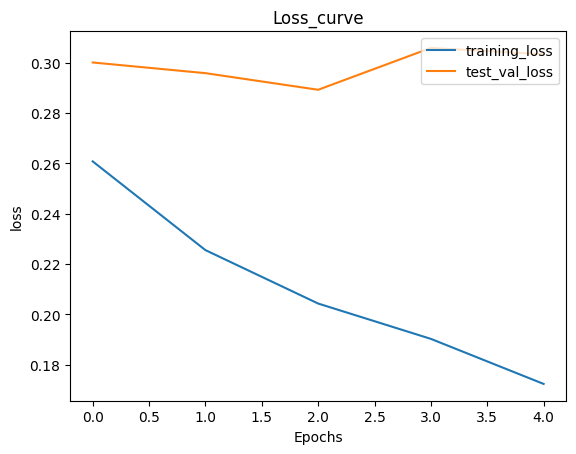

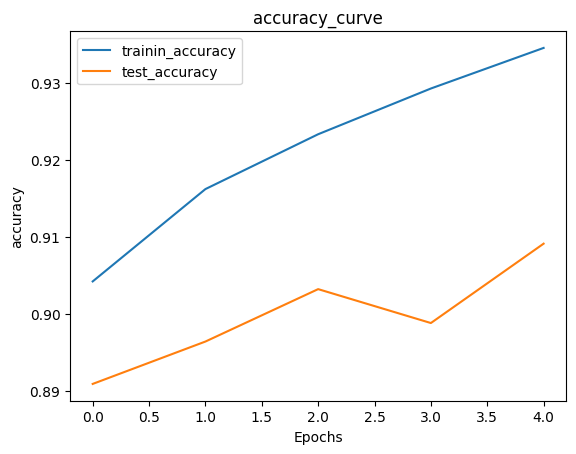

In [39]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

In [40]:
## Reduisons le overfiting

In [67]:
model = Sequential([ 
    
                #extraction de caracteristiques
    
                tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
                tf.keras.layers.Dropout(0.6), # premier dropout
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                tf.keras.layers.Dropout(0.4), # deuxieme dropout
                tf.keras.layers.MaxPooling2D(2,2),
                
                #flatten
                  tf.keras.layers.Flatten(),  
                    #dense
                    Dense(units=128,activation='relu'),
                    tf.keras.layers.Dropout(0.2),
                    Dense(units=2,activation='sigmoid')
                    
                   ])
    
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
h = model.fit(training_images,training_labels,epochs=20,
              validation_data=(test_images,test_labels),
             
             )

Epoch 1/20
1875/1875 [==============================] - ETA: 0s - loss: 0.9793 - accuracy: 0.7576

ValueError: Data cardinality is ambiguous:
  x sizes: 1
  y sizes: 10000
Make sure all arrays contain the same number of samples.

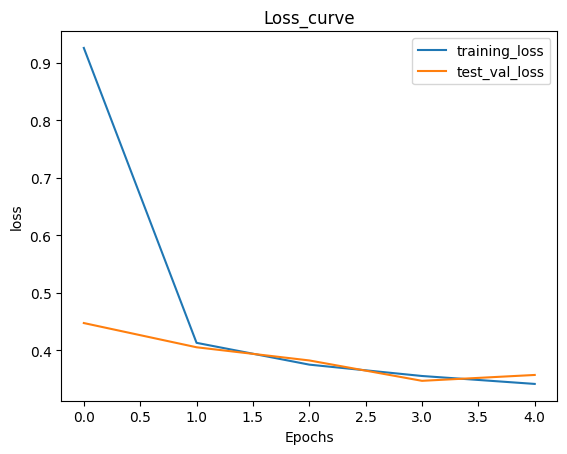

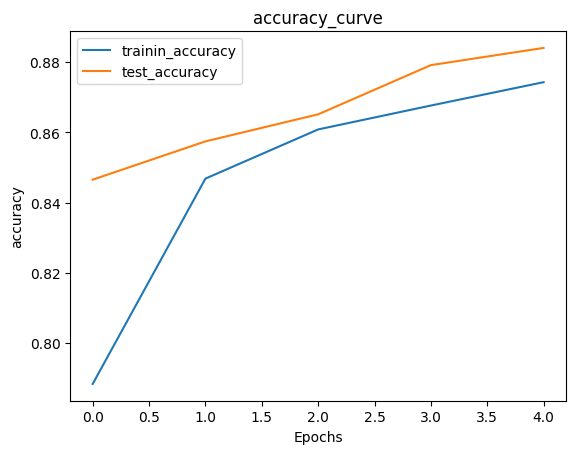

In [47]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

In [7]:
import os

In [8]:
data_dir = 'DATASET'

In [9]:
train_dir = os.path.join(data_dir,"TRAIN")
test_dir = os.path.join(data_dir,"TEST")


In [10]:
os.listdir(train_dir)

['O', 'R']

In [11]:
train_r_dir = os.path.join(train_dir,"R")
test_o_dir = os.path.join(test_dir,"O")

In [12]:

len(os.listdir(train_r_dir))

9999

In [13]:
len(os.listdir(test_o_dir))

1401

In [14]:
## ImageDataGenerator pour rendre les choses plus facile a entrainer

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_data_generator = ImageDataGenerator(rescale =1/255.0)
test_data_generator = ImageDataGenerator(rescale =1/255.0)

In [17]:
train_generator = train_data_generator.flow_from_directory(
                   directory = train_dir,
                    target_size= (224,224),
                       batch_size =32,
                       class_mode='binary' 

)

test_generator = test_data_generator.flow_from_directory(
                   directory = test_dir,
                    target_size= (224,224),
                       batch_size =32,
                       class_mode='binary' 

)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
# Mais quelles sont les classes? On utilises la fonction class_indices 

In [19]:
train_generator.class_indices


{'O': 0, 'R': 1}

In [20]:
batch_images,batch_labels = next(iter(train_generator))
batch_imagesT,batch_labelsT = next(iter(test_generator))

In [21]:
batch_images.shape

(32, 224, 224, 3)

In [22]:
batch_labels.shape

(32,)

In [23]:
batch_imagesT.shape

(32, 224, 224, 3)

In [24]:
 ## Entrainenment du model

In [25]:
model = Sequential([ 
    
                #extraction de caracteristiques
    
                tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(224,224,3)),
                # premier dropout
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                 # deuxieme dropout
                tf.keras.layers.MaxPooling2D(2,2),
                 tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
                 # deuxieme dropout
                tf.keras.layers.MaxPooling2D(2,2),
                 tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
               # deuxieme dropout
                tf.keras.layers.MaxPooling2D(2,2),
                
                #flatten
                  tf.keras.layers.Flatten(),  
                    #dense
                    Dense(units=128,activation='relu'),
                    tf.keras.layers.Dropout(0.4),
                    Dense(units=1,activation='sigmoid')
                    
                   ])
    
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
h = model.fit(train_generator,epochs=10,
              validation_data=test_generator,
             
             )

Epoch 1/10
706/706 [==============================] - 10264s 15s/step - loss: 0.4328 - accuracy: 0.8129 - val_loss: 0.3347 - val_accuracy: 0.8886
Epoch 2/10
706/706 [==============================] - 1811s 3s/step - loss: 0.3627 - accuracy: 0.8519 - val_loss: 0.2906 - val_accuracy: 0.8810
Epoch 3/10
706/706 [==============================] - 1616s 2s/step - loss: 0.3325 - accuracy: 0.8682 - val_loss: 0.2235 - val_accuracy: 0.9140
Epoch 4/10
706/706 [==============================] - 1636s 2s/step - loss: 0.3128 - accuracy: 0.8765 - val_loss: 0.3293 - val_accuracy: 0.8651
Epoch 5/10
706/706 [==============================] - 1523s 2s/step - loss: 0.2864 - accuracy: 0.8848 - val_loss: 0.2276 - val_accuracy: 0.9184
Epoch 6/10
706/706 [==============================] - 1487s 2s/step - loss: 0.2634 - accuracy: 0.8996 - val_loss: 0.2596 - val_accuracy: 0.8977
Epoch 7/10
706/706 [==============================] - 1462s 2s/step - loss: 0.2358 - accuracy: 0.9068 - val_loss: 0.2492 - val_accurac

model.summary()

In [27]:
model.save('poubelle_model.keras')

In [28]:
from keras.models import load_model

loaded_model = load_model('poubelle_model.keras')


In [29]:
loaded_model.evaluate(test_generator)

79/79 [==============================] - 41s 493ms/step - loss: 0.3043 - accuracy: 0.9144


[0.30431634187698364, 0.9144448637962341]

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0